In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regression

We will try some regression methods on the data we have used in **Exploratory Data Analysis**. That is the dataset [Melbourne housing from kaggle.com](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/download). Below we suppose that the downloaded ZIP-file `archive.zip` is in the subdirectory `data` of the directory where this notebook is located. Pandas `read_csv()` function can also open a compressed CSV-file.

In [30]:
data = pd.read_csv('data/archive.zip')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


The table contains information on real-estates in Melbourne, Australia. Let us look 

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

At this moment, we must find out what is in the data. The following is a quote from [the original](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) description posted by the author of the dataset 

>This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D. (Central Buisiness District). 

>….Now with extra data including including property size, land size and council area, you may need to change your code!

>Some Key Details
Suburb: Suburb

>Address: Address

>Rooms: Number of rooms

>Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

>Price: Price in Australian dollars

>Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

>SellerG: Real Estate Agent

>Date: Date sold

>Distance: Distance from CBD in Kilometres

Postcode> self explanatory

>Bedroom2 : Scraped # of Bedrooms (from different source)

>Bathroom: Number of Bathrooms

>Car: Number of carspots

>Landsize: Land Size in Metres

>BuildingArea: Building Size in Metres

>YearBuilt: Year the house was built

>CouncilArea: Governing council for the area

>Lattitude: Self explanitory

>Longtitude: Self explanitory

>Regionname: General Region (West, North West, North, North east …etc)

>Propertycount: Number of properties that exist in the suburb.

Let us display more samples from the dataset.


In [32]:
pd.set_option('display.max_columns',100)  # for showing more columns
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [33]:
data.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12907,Bentleigh East,17 Gowrie St,4,h,1115000.0,S,Ray,19/08/2017,13.8,3165.0,4.0,1.0,2.0,579.0,NaN,NaN,NaN,-37.91524,145.07686,Southern Metropolitan,10969.0
13416,Ferntree Gully,2/6 Simpson Rd,2,h,594000.0,S,Ray,26/08/2017,24.8,3156.0,2.0,1.0,1.0,550.0,NaN,NaN,NaN,-37.87837,145.28104,Eastern Metropolitan,10788.0
4618,Pascoe Vale,1/23 Stewart St,2,h,601500.0,S,hockingstuart,7/05/2016,9.9,3044.0,2.0,1.0,1.0,253.0,NaN,2000.0,Moreland,-37.72860,144.92490,Northern Metropolitan,7485.0
11610,Brunswick,9 First Av,3,h,1260000.0,S,Jellis,22/07/2017,5.2,3056.0,3.0,2.0,1.0,470.0,NaN,NaN,Moreland,-37.75560,144.95729,Northern Metropolitan,11918.0
12281,Doncaster East,69 Bowen Rd,4,h,1470000.0,PI,Barry,3/09/2017,14.3,3109.0,4.0,2.0,2.0,775.0,NaN,NaN,NaN,-37.80126,145.16650,Eastern Metropolitan,10999.0


Before doing any analysis, we should correct missing and invalid data.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

There are missing values in several attributes. Let us fill them with some suitable values.

In [35]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data['Car'] = imp_mean.fit_transform(data['Car'].to_numpy().reshape(-1,1))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [36]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
data['Landsize'] = imp_median.fit_transform(data['Landsize'].to_numpy().reshape(-1,1))
data['BuildingArea'] = imp_median.fit_transform(data['BuildingArea'].to_numpy().reshape(-1,1))
data['YearBuilt'] = imp_median.fit_transform(data['YearBuilt'].to_numpy().reshape(-1,1))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

One attribute contains still some undefined values. You can correct that but it not necessary for the further computations.

## Correlation

In [37]:
corr = data.corr(numeric_only=True)

It is hard to spot any patterns in such a big table. It is easier with a heatmap.

<Axes: >

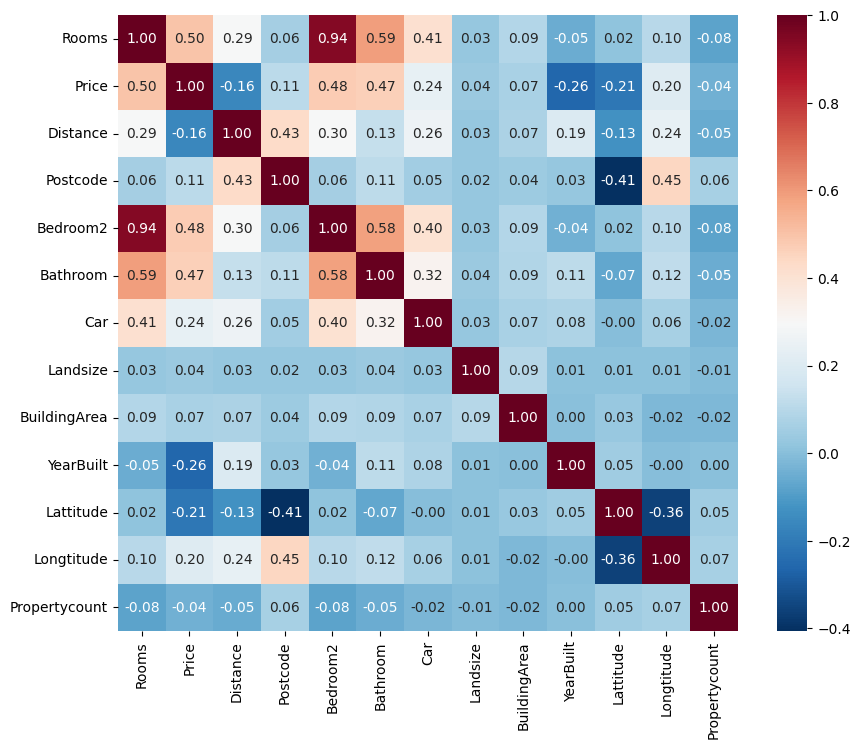

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu_r', annot=True, fmt='.2f')

Let us find attributes that are most correlated with the `Price`. Illustrate the correlation with plots.

In [39]:
print(corr["Price"].sort_values(ascending=False,key=lambda col: col.abs()))


Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
YearBuilt       -0.259387
Car              0.238637
Lattitude       -0.212934
Longtitude       0.203656
Distance        -0.162522
Postcode         0.107867
BuildingArea     0.069763
Propertycount   -0.042153
Landsize         0.037507
Name: Price, dtype: float64


## Linear Regression for One Input Variable

Compute a linear approximation of 
* `Price` according to `Rooms`,
* `Price` according to `YearBuilt`.
* `Rooms` according to `Bedroom2`

plot the relation between the two attributes and asses the error. **Do not use any library function for linear regression!**

In [40]:
def alpha_beta_linear_regression(x, y):
    avgX = np.average(x)
    avgY = np.average(y)
    numeratorSum = x*(y-avgY)
    nominatorSum = x*(x-avgX)
    sumNum = np.sum(numeratorSum)
    sumNom = np.sum(nominatorSum)
    beta = sumNum/sumNom
    alpha = avgY - beta*avgX
    return alpha, beta

### `Price` according to `Rooms`

In [41]:
price_by_rooms_alpha, price_by_rooms_beta = alpha_beta_linear_regression(data['Rooms'], data['Price'])
pred = price_by_rooms_alpha + price_by_rooms_beta *  data['Rooms']
mse = ((data['Price'] - pred)**2).mean()
print(f"{mse=}")
rmse = np.sqrt(mse)
print(f"{rmse=}")

mse=307887224039.27515
rmse=554875.8636301232


Plot the predicted price against the actual price. Add a line representing the desired relation between `Price` and its prediction. The plot should be similar to the following
<img src='attachment:3b2c7bf3-b852-45bd-a6d7-6b2f6e6090f9.png' width=400>

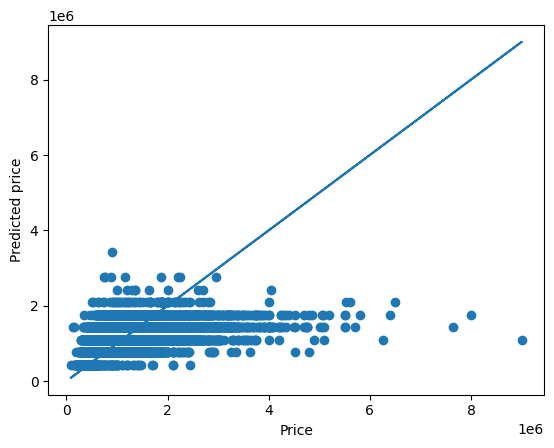

In [42]:
_ = plt.scatter(data['Price'], pred)
plt.xlabel('Price')
plt.ylabel("Predicted price")

plt.plot(data['Price'],data['Price'])


Why are the marks in the plot grouped in horizontal lines?

Compute a score of the approximation of price by linear regression &ndash; the coefficient of determination $R^2$ of the prediction.

In [43]:
from sklearn.metrics import r2_score

r2_score(data['Price'], pred)

0.24664500832254732

Below, plot `Price` against `Rooms` and add the line representing the predicted price. E.g.,

<img src='attachment:e55654d3-cefb-4872-b156-9d1488e94620.png' width=400>

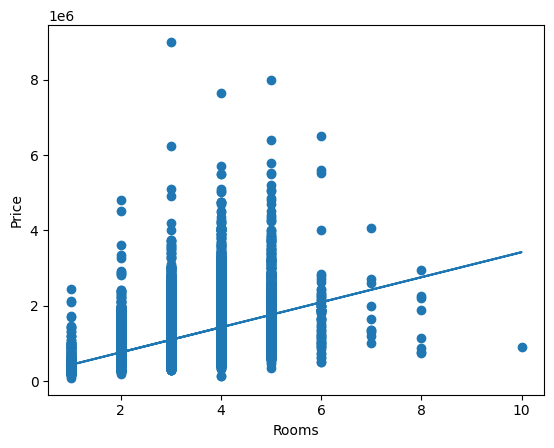

In [44]:
_ = plt.scatter(data['Rooms'], data['Price'])
plt.xlabel('Rooms')
plt.ylabel("Price")

plt.plot(data['Rooms'],pred)

### `Price` according to `YearBuilt`

Repeat the above analysis. Try to predict `Price` based on `YearBuilt`

In [45]:
x = 'YearBuilt'
y = 'Price'
alpha, beta = alpha_beta_linear_regression(data[x], data[y])
pred = alpha + beta *  data[x]
mse = ((data[y] - pred)**2).mean()
print(f"{mse=}")
rmse = np.sqrt(mse)
print(f"{rmse=}")

mse=381190857808.2367
rmse=617406.5579569403


Plot the predicted price against the actual price. Add a line representing the desired relation between `Price` and its prediction. The plot should be similar to the following
<img src='attachment:3b2c7bf3-b852-45bd-a6d7-6b2f6e6090f9.png' width=400>

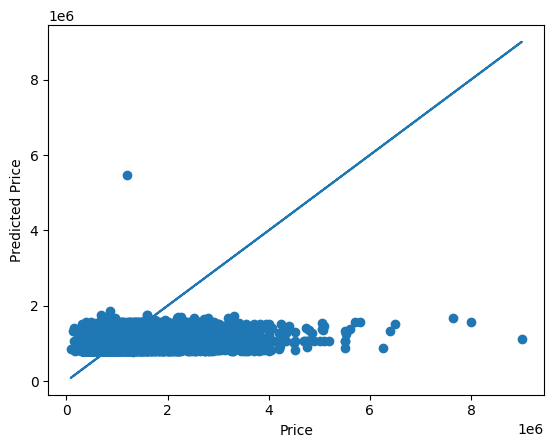

In [46]:
_ = plt.scatter(data[y], pred)
plt.xlabel(y)
plt.ylabel(f"Predicted {y}")

# insert the line representing the desired result
# YOUR CODE HERE
plt.plot(data[y],data[y])

Compute a score of the approximation of price by linear regression &ndash; the coefficient of determination $R^2$ of the prediction.

In [47]:
from sklearn.metrics import r2_score

r2_score(data[y], pred)

0.06728174120335528

Below, plot `Price` against `YearBuilt` and add the line representing the predicted price. E.g.,

<img src='attachment:e55654d3-cefb-4872-b156-9d1488e94620.png' width=400>

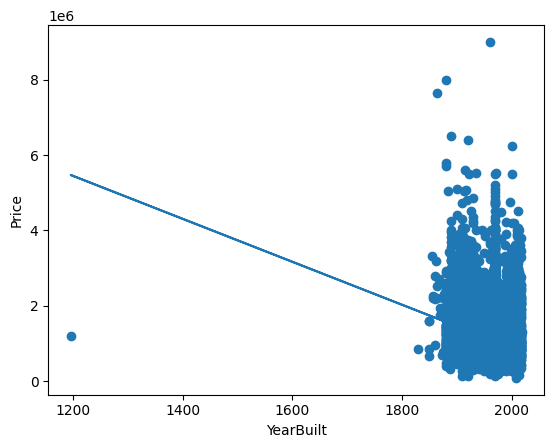

In [49]:
_ = plt.scatter(data[x], data[y])
plt.xlabel(x)
plt.ylabel(y)

# add the line with predictions computed using the linear regression
# YOUR CODE HERE
plt.plot(data[x],pred)

### `Rooms` according to `Bedroom2`

In [50]:
rooms_by_bedroom2_alpha, rooms_by_bedroom2_beta = alpha_beta_linear_regression(data['Bedroom2'], data['Rooms'])
pred = rooms_by_bedroom2_alpha + rooms_by_bedroom2_beta *  data['Bedroom2']
mse = ((data['Rooms'] - pred)**2).mean()
print(f"{mse=}")
rmse = np.sqrt(mse)
print(f"{rmse=}")

mse=0.09910679117504102
rmse=0.31481231102839835


Plot the predicted price against the actual price.

Text(0, 0.5, 'Predicted rooms')

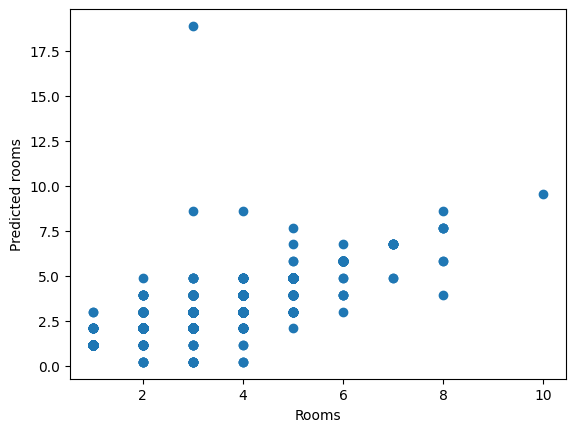

In [51]:
_ = plt.scatter(data['Rooms'], pred)
plt.xlabel('Rooms')
plt.ylabel("Predicted rooms")

## Linear Regression Using Functions from `scikit-learn`.

Coefficients: [332203.94464777]
Intercept: 99669.86858933
The coefficient of determination R^2 of the predictionis 0.2466450083225472


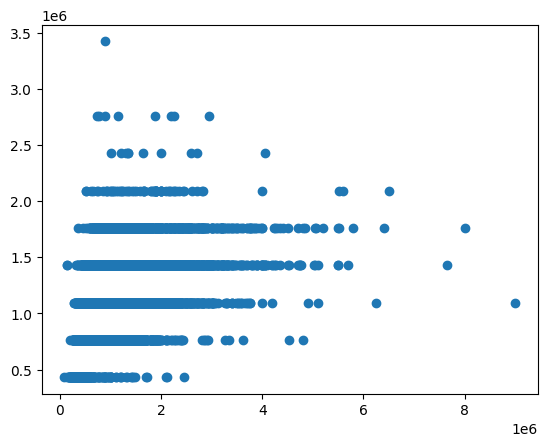

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data['Rooms'].values.reshape(-1,1),data['Price'])
print('Coefficients:',lr.coef_)
print('Intercept:',lr.intercept_)

pred = lr.predict(data['Rooms'].values.reshape(-1,1))

plt.scatter(data['Price'], pred)

print(f'The coefficient of determination R^2 of the prediction'
      f'is {lr.score(data["Rooms"].values.reshape(-1,1),data["Price"])}')

We can insert more in formation in the plot. We can, e.g., color-code the `Type`-attribute.

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['Type'].unique())
print(le.transform(data['Type']))
print(le.classes_)
print(le.transform(['h','t','u']))

[0 0 0 ... 0 0 0]
['h' 't' 'u']
[0 1 2]


Coefficients: [332203.94464777]
Intercept: 99669.86858933
The coefficient of determination R^2 of the predictionis 0.2466450083225472


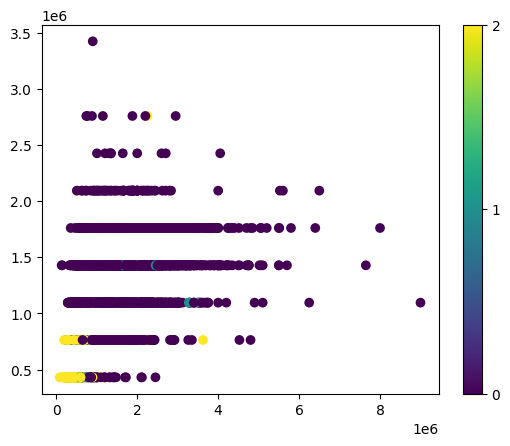

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data['Rooms'].values.reshape(-1,1),data['Price'])
print('Coefficients:',lr.coef_)
print('Intercept:',lr.intercept_)

pred = lr.predict(data['Rooms'].values.reshape(-1,1))

ax = plt.scatter(data['Price'],pred, c=le.transform(data['Type']))
plt.colorbar(ax, ticks=np.arange(le.transform(data['Type']).max() + 1))

print(f'The coefficient of determination R^2 of the prediction'
      f'is {lr.score(data["Rooms"].values.reshape(-1,1),data["Price"])}')

#### `Price` according to `YearBuilt`

Coefficients: [-5700.81761506]
Intercept: 12287984.997539414
The coefficient of determination R^2 of the predictionis 0.06728174120335528


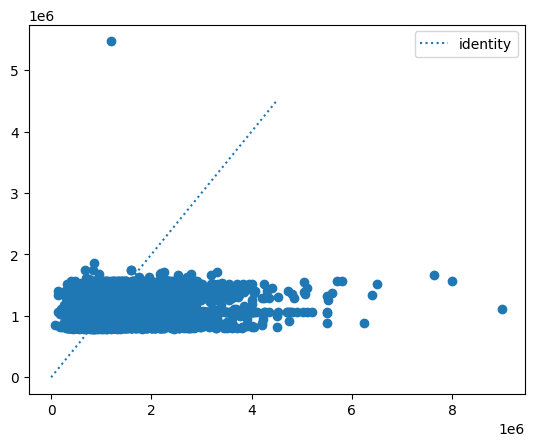

In [55]:
lr = LinearRegression()
lr.fit(data['YearBuilt'].values.reshape(-1,1),data['Price'])
print('Coefficients:',lr.coef_)
print('Intercept:',lr.intercept_)

pred = lr.predict(data['YearBuilt'].values.reshape(-1,1))

plt.scatter(data['Price'], pred)
plt.plot([0, data['Price'].max() / 2], [0, data['Price'].max() / 2], ':', label='identity')
plt.legend()

print(f'The coefficient of determination R^2 of the prediction'
      f'is {lr.score(data["YearBuilt"].values.reshape(-1,1),data["Price"])}')

Remove the evident outlier from the dataset. Let the constructed DataFrame be `data1`.

In [57]:
# YOUR CODE HERE
data1 = data[data["YearBuilt"]>1300]


Coefficients: [-6002.89634243]
Intercept: 12882441.468345746
The coefficient of determination R^2 of the predictionis 0.0707434595376103


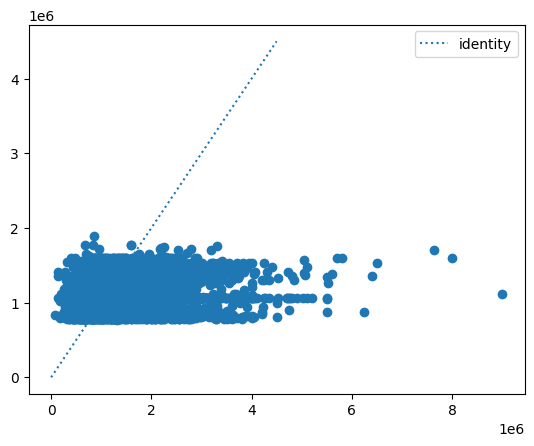

In [58]:
lr.fit(data1['YearBuilt'].values.reshape(-1,1),data1['Price'])
print('Coefficients:',lr.coef_)
print('Intercept:',lr.intercept_)

pred = lr.predict(data1['YearBuilt'].values.reshape(-1,1))

plt.scatter(data1['Price'], pred)
plt.plot([0, data1['Price'].max() / 2], [0, data1['Price'].max() / 2], ':', label='identity')
plt.legend()

print(f'The coefficient of determination R^2 of the prediction'
      f'is {lr.score(data1["YearBuilt"].values.reshape(-1,1),data1["Price"])}')

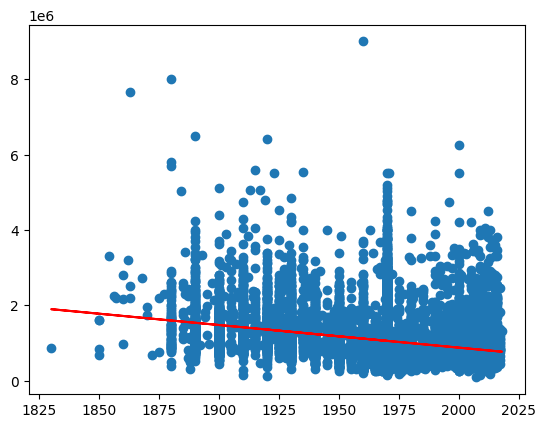

In [61]:
plt.scatter(data1['YearBuilt'],data1["Price"])
plt.plot(data1['YearBuilt'],pred,c="red")

## Use `scikit-learn` and many attributes
Using functions from `scikit-learn` estimatete price using suitable subset of other available attributes. Estimate the error when using your model for predicting price of a house/flat.

In [62]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,126.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,126.0,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Coefficients: [ 2.40005876e+05 -4.11840437e+03  3.97688576e+04  1.98917545e+05
  6.88640355e+04  3.47410669e+00  5.84334774e+01 -3.31589708e+00
 -1.27957494e+06  7.37080389e+05 -4.44821061e+04  8.27329187e+02]
Intercept: -149417779.77598566
MSE: 193417835270.5487
The coefficient of determination R^2 of the predictionis 0.5220726137874134


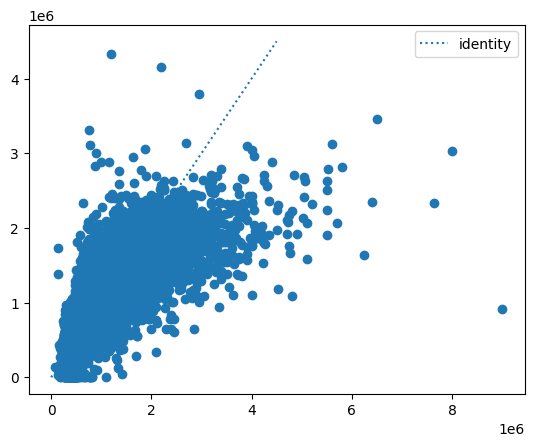

In [63]:
cols = ["Rooms", "YearBuilt", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", 
        "Propertycount", "Lattitude", "Longtitude", "Distance", "Postcode"]

lr = LinearRegression()
lr.fit(data[cols].values.reshape(-1,len(cols)),data['Price'])
print('Coefficients:',lr.coef_)
print('Intercept:',lr.intercept_)

pred = lr.predict(data[cols].values.reshape(-1,len(cols)))
pred = np.max([pred, np.zeros(pred.shape)], axis = 0)

plt.scatter(data['Price'], pred)
plt.plot([0, data['Price'].max() / 2], [0, data['Price'].max() / 2], ':', label='identity')
plt.legend()
print(f"MSE: {np.mean(np.power(pred - data['Price'],2))}")

print(f'The coefficient of determination R^2 of the prediction'
      f'is {lr.score(data[cols].values.reshape(-1,len(cols)),data["Price"])}')

In the data there are different types of houses/apartments.

<Axes: xlabel='count', ylabel='Type'>

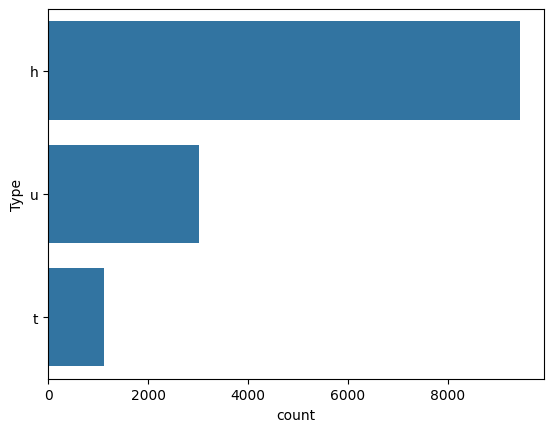

In [64]:
sns.countplot(y='Type', data=data)

Do the same linear regression but for each type of real estate separately.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


Use one-hot encoding to store the type of real estate (the method `get_dummies()` of pandas). Include new features in the linear regression. Is the resulting regression better?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


Does `Postcode` depend linearly on the geographic coordinates `Latitude` and `Longtitude`?

<Axes: xlabel='Longtitude', ylabel='Lattitude'>

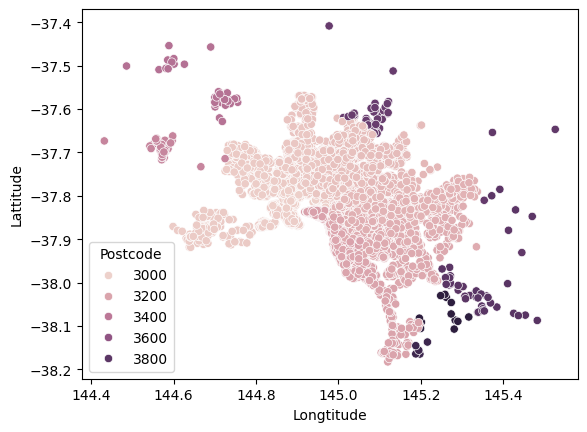

In [68]:
sns.scatterplot(x=data["Longtitude"],y=data["Lattitude"],hue=data["Postcode"])

Coefficients: [-323.79901509  300.29391765]
Intercept: -52678.46220079683
MSE: 6016.621830596198
The coefficient of determination R^2 of the predictionis 0.2682027818888245


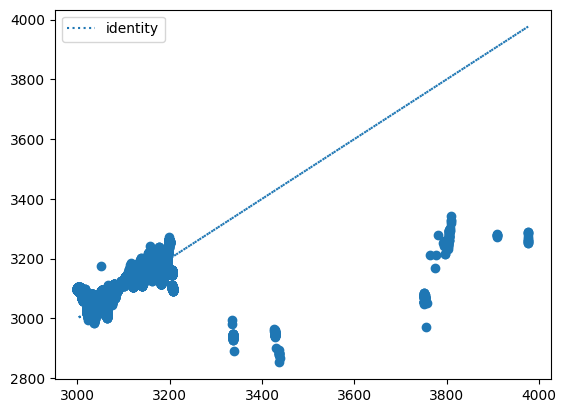

In [69]:
cols = ["Lattitude", "Longtitude"]


lr = LinearRegression()
lr.fit(data[cols].values.reshape(-1,len(cols)),data['Postcode'])
print('Coefficients:',lr.coef_)
print('Intercept:',lr.intercept_)

pred = lr.predict(data[cols].values.reshape(-1,len(cols)))
pred = np.max([pred, np.zeros(pred.shape)], axis = 0)

plt.scatter(data['Postcode'], pred)
plt.plot(data['Postcode'] ,data['Postcode'], ':', label='identity')
plt.legend()
print(f"MSE: {np.mean(np.power(pred - data['Postcode'],2))}")

print(f'The coefficient of determination R^2 of the prediction'
      f'is {lr.score(data[cols].values.reshape(-1,len(cols)),data["Postcode"])}')

Add the product of `Lattitude` and `Longtitude` as nd additional atribute to the attributes `Lattitude` and `Longtitude`. Does it help in linear regression of the postcode?

The coefficient of determination R^2 of the predictionis 0.44712392051382877


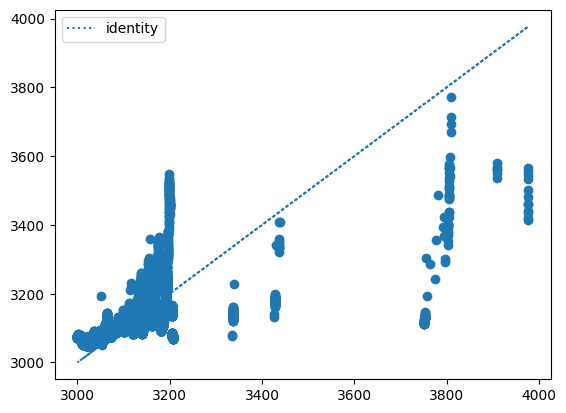

In [70]:
from sklearn.pipeline import Pipeline

data['LongitudeSq'] = data['Longtitude'] * data['Longtitude']
data['LatitudeSq'] = data['Lattitude'] * data['Lattitude']
data['LatLonProd'] = data['Longtitude'] * data['Lattitude']

# YOUR CODE HERE
columns = ['Longtitude', 'Lattitude', 'LongitudeSq', 'LatitudeSq', 'LatLonProd']

datas = data[columns]

lr = Pipeline([
    ('linear_regression', LinearRegression())
])

lr.fit(datas,data['Postcode'])

pred = lr.predict(datas)

plt.scatter(data['Postcode'], pred)
plt.plot(data['Postcode'], data['Postcode'], ':', label='identity')
plt.legend()

print(f'The coefficient of determination R^2 of the prediction'
      f'is {lr.score(datas,data["Postcode"])}')


Add squares of `Lattitude` and `Longtitude`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


# Clustering

Find clusters in the data using $k$-means algorithmn and hierarchical clustering (classes `KMeans` and `AgglomerativeClustering` in `sklearn.cluster`). Try to answer the following questions:
1. What is the best number of clusters?
2. What are the sizes of the clusters?
3. How can we visualize the result of clustering?
    * using PCA
    * plotting according to the geographical coordinates
4. Can normalization help to obtain better clustering?


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=9)

X = ...
y = ...

# YOUR CODE HERE
raise NotImplementedError()

km.fit(X)

print(f'Score {km.inertia_} for {len(km.cluster_centers_)} clusters')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=65fcb34a-c427-4024-8ada-ed800cd6c50c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>